The Sparks Foundation


Prediction using Decision Tree Algorithm

By Krishna Chaitanya Velagapudi

In [15]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the Iris Dataset

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = data.drop(['Id','Species'],axis=1)
y = data['Species']
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#checking for Null Values
x.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Decision Tree Classifier

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy Score

In [6]:
y_pred = dtree.predict(x_test)
y_train_pred=dtree.predict(x_train)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac = accuracy_score(y_test,y_pred)
print('Accuracy',ac*100)

Accuracy 100.0


Now it is time for post pruning of the decision tree. Pruning is the process of cutting down the unnecessary branches of the decision tree to reduce overfitting and complexity.

Let us first observe the decision-split of the tree before Pruning

[Text(257.53846153846155, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(193.15384615384616, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(321.9230769230769, 427.11428571428576, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(128.76923076923077, 349.4571428571429, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(64.38461538461539, 271.8, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(193.15384615384616, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 349.4571428571429, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(321.9230769230769, 271.8, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(257.53846153846155, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(386.3076923076923, 194.14285714285717, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.

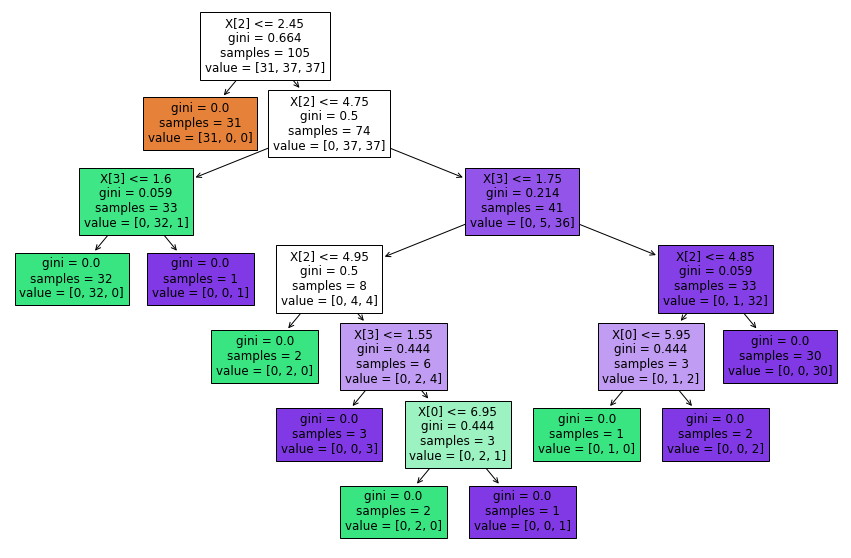

In [7]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

In [8]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684, 0.31210884])

In [9]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3121088435374149


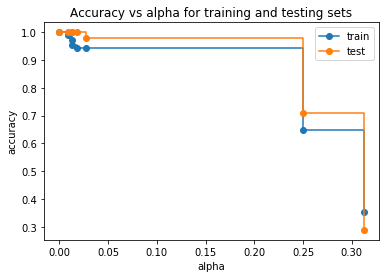

In [10]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

From the graph we can say that between the alpha values of 0 and 0.04 the accuracy is the highest

In [11]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy after Pruning :',accuracy_score(y_test,pred)*100)

Accuracy after Pruning : 100.0


Visualization of the decision tree after Pruning

[Text(279.0, 504.7714285714286, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(186.0, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(372.0, 427.11428571428576, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(186.0, 349.4571428571429, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(93.0, 271.8, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(279.0, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(558.0, 349.4571428571429, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(465.0, 271.8, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(372.0, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(558.0, 194.14285714285717, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(465.0, 116.48571428571432, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(651.0, 116.48571428571432, 'X[2] <= 5.45\ngini = 0.

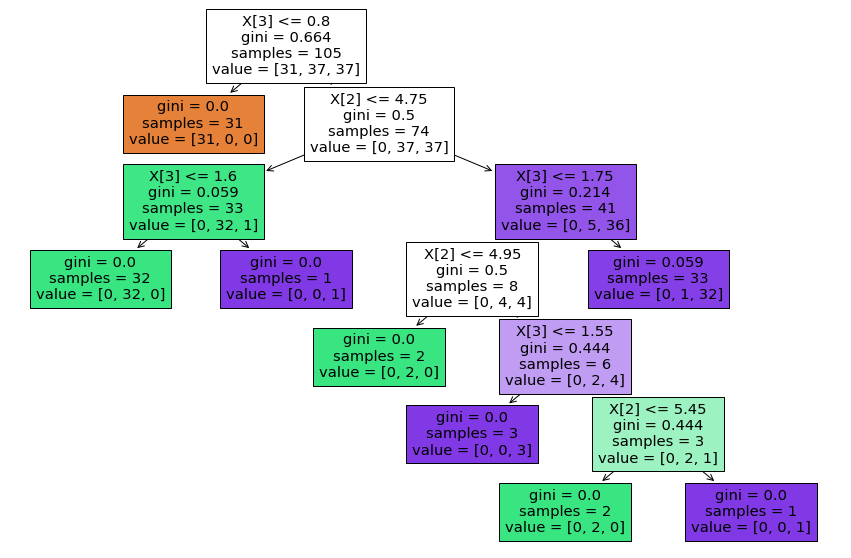

In [13]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

Classification Report

In [14]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

